# Sheridan Kamal

## DATA 73500 - In Class Activity (3/2/2020)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

data = pd.read_json('https://data.cityofnewyork.us/resource/43nn-pn8j.json')
data.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,50008039,CAFE LILY,Brooklyn,42,AVENUE O,11204.0,7188725500,Russian,2016-11-10T00:00:00.000,Violations were cited in the following area(s).,...,2020-05-13T06:01:20.000,Cycle Inspection / Re-inspection,40.610245,-73.983584,311.0,44.0,43000.0,3174148.0,3.065970e+09,BK29
1,50002109,DUNKIN',Manhattan,4030,BROADWAY,10032.0,2129232222,Donuts,2019-02-26T00:00:00.000,Violations were cited in the following area(s).,...,2020-05-13T06:01:20.000,Cycle Inspection / Initial Inspection,40.842001,-73.938989,112.0,10.0,25300.0,1063014.0,1.021260e+09,MN36
2,40380657,PETE'S CLAM STOP,Brooklyn,1320,SURF AVENUE,11224.0,7183720302,American,2018-07-19T00:00:00.000,Violations were cited in the following area(s).,...,2020-05-13T06:01:20.000,Cycle Inspection / Initial Inspection,40.575529,-73.981850,313.0,47.0,35200.0,3329350.0,3.070740e+09,BK21
3,50049095,ASUKA SUSHI,Manhattan,300,WEST 23 STREET,10011.0,2127270888,Japanese,2019-02-21T00:00:00.000,Violations were cited in the following area(s).,...,2020-05-13T06:01:20.000,Cycle Inspection / Initial Inspection,40.745459,-73.998917,104.0,3.0,9300.0,1013429.0,1.007468e+09,MN13
4,41494383,LEMON LIFE,Manhattan,255,EAST 110 STREET,10029.0,2123692886,Japanese,2019-10-28T00:00:00.000,Violations were cited in the following area(s).,...,2020-05-13T06:01:20.000,Cycle Inspection / Initial Inspection,40.793629,-73.941601,111.0,8.0,18000.0,1052465.0,1.016608e+09,MN34


In [2]:
data.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl',
       'nta'],
      dtype='object')

In [3]:
data.describe()

,camis,zipcode,phone,score,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,1.000000e+03,980.000000,1.000000e+03,955.000000,998.000000,998.000000,978.000000,978.000000,978.000000,9.760000e+02,9.980000e+02
mean,4.630298e+07,10663.455102,5.428011e+09,20.455497,39.913486,-72.462356,243.335378,19.702454,28848.685072,2.456006e+06,2.342607e+09
std,4.379377e+06,593.021068,2.480853e+09,15.329876,5.711016,10.367788,128.799273,15.922998,31008.083602,1.331294e+06,1.327327e+09
min,4.036287e+07,10001.000000,3.475126e+07,0.000000,0.000000,-74.231871,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.142062e+07,10022.000000,2.128570e+09,11.000000,40.686664,-73.989781,105.000000,4.000000,7600.000000,1.040361e+06,1.010353e+09
50%,5.000739e+07,10467.000000,7.182592e+09,13.000000,40.732058,-73.959188,301.000000,19.000000,15700.000000,3.000319e+06,2.049740e+09
75%,5.005976e+07,11223.250000,7.186700e+09,26.500000,40.762776,-73.900151,317.000000,34.000000,40475.000000,3.340768e+06,3.073943e+09
max,5.010383e+07,11694.000000,9.293683e+09,157.000000,40.906341,0.000000,503.000000,51.000000,161700.000000,5.157945e+06,5.077020e+09


In [4]:
data.boro.value_counts()

Manhattan        403
Brooklyn         260
Queens           207
Bronx             98
Staten Island     31
0                  1
Name: boro, dtype: int64

<IPython.core.display.Javascript object>


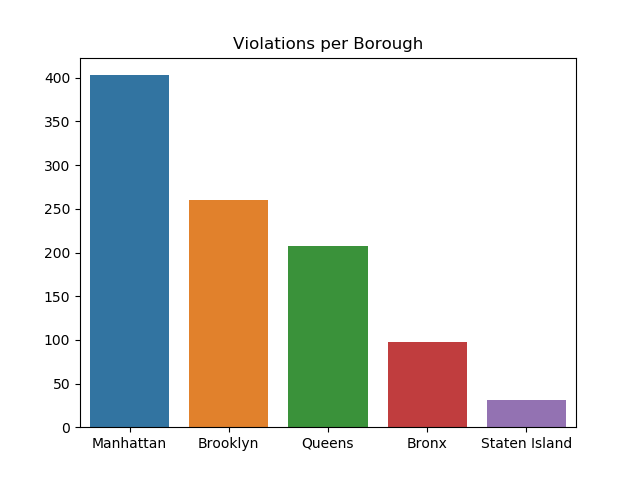

Text(0.5, 1.0, 'Violations per Borough')

In [5]:
sns.barplot(x = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], y = [403, 260, 207, 98, 31])
plt.title('Violations per Borough')